In [1]:
%matplotlib widget
# %matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import sys
sys.path.insert(0, '..')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from Xana import Xana
from Xana import Soq
# from Xana.XpcsAna import CorrFunc as G2
import pickle
from glob import glob
import re
# from lmfit.models import LinearModel
# from pathlib import Path
#plt.style.use('../nbstyle.mplstyle')

In [3]:
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
anadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed'
maddadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/maddalena/03-analysis'

# Analysis database

In [18]:
datafolder = 'ferritin_5_water'
datasetnumber = 1

In [6]:
# ana_db_files = glob(f'{anadir}/results/{datafolder}_{datasetnumber:04d}/p*/analysis_database.pkl')
ana_db_files = f'{maddadir}/analysis_database.pkl'
os.path.isfile(ana_db_files)

True

In [9]:
d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', 
        setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl')

maskfile = d.setup.maskfile

d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', 
            setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl',
            maskfile=maskfile)

d.load_db(ana_db_files)

Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Try loading database:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/maddalena/03-analysis/analysis_database.pkl
Successfully loaded database


In [10]:
len(d.db)

388

In [11]:
d.db

use                 sample analysis series t_exposure t_readout nframes  \
0    True                   DUKE     saxs      5    0.00003  0.000003     999   
1    True                   DUKE     xpcs      5    0.00003  0.000003    1000   
2    True           silica_gly23     saxs     12     0.0001  0.000003     999   
3    True      silica_gly23_SAXS     saxs      1      0.001  0.000003       1   
4    True      silica_gly23_SAXS     saxs      2      0.001  0.000003       1   
..    ...                    ...      ...    ...        ...       ...     ...   
383  True  ferritin_conc_gly50_3     xpcs     26     0.0004  0.000003    5000   
384  True  ferritin_conc_gly50_3     xpcs     27     0.0004  0.000003    5000   
385  True  ferritin_conc_gly50_3     xpcs     28     0.0004  0.000003    5000   
386  True  ferritin_conc_gly50_3     xpcs     29     0.0004  0.000003    5000   
387  True  ferritin_conc_gly50_3     xpcs     30     0.0004  0.000003    5000   

                                                master first  last  \
0    /data/visitor/sc5275/id10/20220614/DUKE/DUKE_0...     1   999   
1    /data/visitor/sc5275/id10/20220614/DUKE/DUKE_0...     0   999   
2    /data/visitor/sc5275/id10/silica_gly23/silica_...     1   999   
3    /data/visitor/sc5275/id10/silica_gly23_SAXS/si...     0     0   
4    /data/visitor/sc5275/id10/silica_gly23_SAXS/si...     0     0   
..                                                 ...   ...   ...   
383  /data/visitor/sc5275/id10/ferritin_conc_gly50_...     0  4999   
384  /data/visitor/sc5275/id10/ferritin_conc_gly50_...     0  4999   
385  /data/visitor/sc5275/id10/ferritin_conc_gly50_...     0  4999   
386  /data/visitor/sc5275/id10/ferritin_conc_gly50_...     0  4999   
387  /data/visitor/sc5275/id10/ferritin_conc_gly50_...     0  4999   

                                                datdir  \
0              /data/visitor/sc5275/id10/20220614/DUKE   
1              /data/visitor/sc5275/id10/20220614/DUKE   
2               /data/visitor/sc5275/id10/silica_gly23   
3          /data/visitor/sc5275/id10/silica_gly23_SAXS   
4          /data/visitor/sc5275/id10/silica_gly23_SAXS   
..                                                 ...   
383  /data/visitor/sc5275/id10/ferritin_conc_gly50_...   
384  /data/visitor/sc5275/id10/ferritin_conc_gly50_...   
385  /data/visitor/sc5275/id10/ferritin_conc_gly50_...   
386  /data/visitor/sc5275/id10/ferritin_conc_gly50_...   
387  /data/visitor/sc5275/id10/ferritin_conc_gly50_...   

                            mod         savname  \
0    2022-06-14 23:59:03.283752  s0005_0012.pkl   
1    2022-06-15 00:00:19.565064  s0005_0013.pkl   
2    2022-06-15 01:24:21.861922  s0012_0014.pkl   
3    2022-06-15 02:25:24.596533  s0001_0015.pkl   
4    2022-06-15 02:25:24.716287  s0002_0016.pkl   
..                          ...             ...   
383  2022-06-17 03:57:32.868324  s0026_0430.pkl   
384  2022-06-17 03:58:29.468159  s0027_0431.pkl   
385  2022-06-17 03:59:26.444998  s0028_0432.pkl   
386  2022-06-17 04:00:32.976312  s0029_0433.pkl   
387  2022-06-17 04:01:33.219576  s0030_0434.pkl   

                                               savfile  \
0    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
1    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
2    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
3    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
4    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
..                                                 ...   
383  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
384  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
385  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
386  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
387  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   

                                             setupfile comment  
0    /gpfs/easy/data/visitor/sc5275/id10/20220614/m...          
1    /gpfs/easy/data/visitor/sc5275/id10/20220614/m... 

# SAXS

In [216]:
d.db['datdir'].loc[0]

PosixPath('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferritin_conc_gly_50_5/ferritin_conc_gly_50_5_0005/scan0225')

In [217]:
# # to add a column to the db with the scan number in order to select the runs from the same measurement
# def get_datdir_number(s):
#     s = str(s)
#     s = re.search('(?<=scan)\d{4}', s)
#     if s is not None:
#         return int(s.group(0))
#     else:
#         return -1
    
# # add column
# d.db['subdir_n'] = d.db['datdir'].apply(get_datdir_number)
# # d.db['scan_n'] = d.db['datdir'].apply(get_scan_number)

In [13]:
def get_scan_number(s):
    s = str(s)
    s = re.search('(?<=scan)\d{4}', s)
    if s is not None:
        return int(s.group(0))
    else:
        return -1
    
def get_rep(x, reps_per_spot=1):
    scan = get_scan_number(x)
    rep = scan % reps_per_spot
    if rep == 0:
        rep = 4
    return rep

In [14]:
d.db['rep'] = d.db['master'].apply(lambda x: get_rep(x, reps_per_spot=4))
d.db['scannumber'] = d.db['datdir'].apply(lambda x: get_scan_number(str(x)))

In [15]:
# d.db['rep'] = d.db['master'].apply(get_rep)

In [16]:
len(d.db[(d.db['analysis'] == 'saxs')].index.values)

76

In [22]:
# rep = 1
# ind_saxs = d.db[(d.db['analysis'] == 'saxs')
#                & (d.db['rep'] == rep)
#                 ].index.values
datafolder = 'water_SAXS'
ind = d.db[(d.db['sample'] == datafolder)].index.values

# # ind_saxs = d.db[(d.db['analysis'] == 'saxs')].index.values
# ind_xpcs = d.db[(d.db['analysis'] == 'xpcs')
#                 & (d.db['rep'] == rep)].index.values
# print(f"number of saxs analysis: {len(ind_saxs)}")
# print(f"number of xpcs analysis: {len(ind_xpcs)}")
# display(d.db.loc[ind_saxs])
d.db.loc[ind]

Empty DataFrame
Columns: [use, sample, analysis, series, t_exposure, t_readout, nframes, master, first, last, datdir, mod, savname, savfile, setupfile, comment, rep, scannumber]
Index: []

In [223]:
s = Soq(d)

In [224]:
tmp = d.get_item(ind_saxs[0])
tmp.keys()

dict_keys(['Isaxs', 'Vsaxs', 'soq'])

/tmp/ipykernel_18606/1361485153.py:11: RuntimeWarning: divide by zero encountered in log
  im2 = a2.imshow(np.log(image), vmin=-7.2, vmax=-6.7)


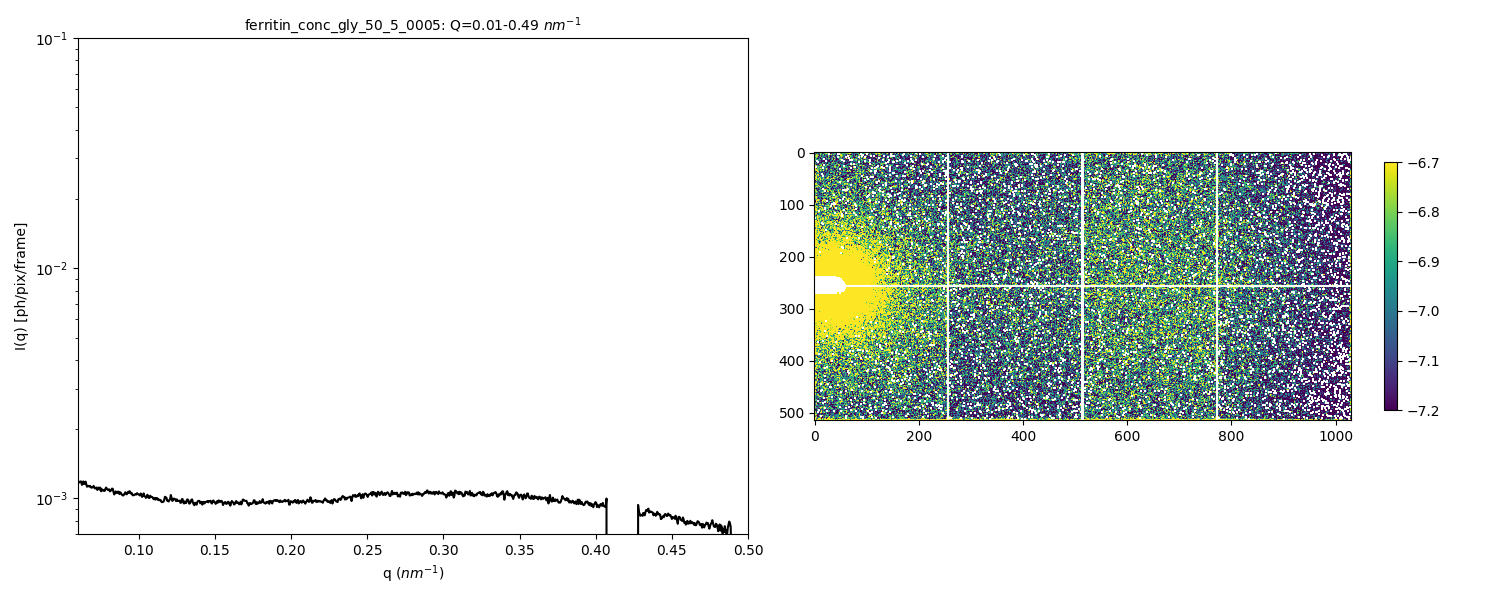

In [225]:
tmp = d.get_item(ind_saxs[1])
soq = tmp['soq']
image = tmp['Isaxs']
# print(image.shape)
f,(a1,a2) = plt.subplots(1,2,figsize=(15,6), tight_layout=True)
# f, a2 = plt.subplots(1,1,figsize=(7,6), tight_layout=True)
# col = plt.cm.viridis(np.linspace(0,1,len(ind)))
a1.plot(soq[:,0], soq[:,1], '-k')
# image[mask==0] = np.nan
# image[mask2==0] = np.nan
im2 = a2.imshow(np.log(image), vmin=-7.2, vmax=-6.7)
plt.colorbar(im2, ax=a2, shrink=0.5)

a1.set_title(f'{datafolder}_{datasetnumber:04d}: Q={soq[0,0]:.2f}-{soq[-1,0]:.2f} $nm^{{-1}}$', fontsize=10)
# a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel('q ($nm^{-1}$)')
a1.set_ylabel('I(q) [ph/pix/frame]')
a1.set_xlim(0.06,0.5)
a1.set_ylim(7e-4,0.1)
plt.show()

In [226]:
mask=np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/cryo-mask-230417_03.npy')

In [227]:
# tmp = d.get_item(ind_saxs[0])
# image = tmp['Isaxs']

image = np.empty(shape=(len(ind_saxs), d.get_item(ind_saxs[0])['Isaxs'].shape[0], d.get_item(ind_saxs[0])['Isaxs'].shape[1]))
mod2 = np.empty(shape=(len(ind_saxs)))

for i in range(0,len(ind_saxs)):
    tmp = d.get_item(ind_saxs[i])
    mod2[i] = np.mean(tmp['Isaxs'][:255, 255:515])
    image[i,:,:] = tmp['Isaxs']
# print(image.shape)

In [228]:
# save apoferritin Iqs
Iqs = np.empty(shape=(len(ind_saxs), len(d.get_item(ind_saxs[0])['soq'][:,1])))
# soq[:,0], soq[:,1]
qI = soq[:,0]

for i in range(len(ind_saxs)):
    tmp = d.get_item(ind_saxs[i])
    Iqs[i,:] = tmp['soq'][:,1]

In [229]:
np.shape(Iqs[mod2<thres2,:])

(112, 1000)

In [230]:
# np.savez("../03-source/Iqs_apo_conc_gly_50_2_0006", Iqs=Iqs[mod2<thres,:], q=qI)

In [231]:
# np.save('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/cryo-mask-230628_01.npy', mask)

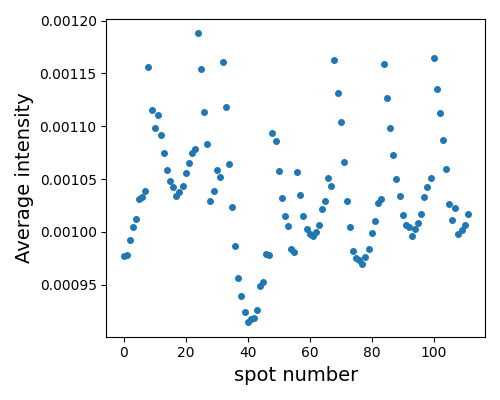

In [238]:
# -- average intensity of upper module 2
plt.figure(figsize=(5,4))
thres, thres2 = 1.1e-3, .96e-3
# thres, thres2 = 1.25e-3, 1.115e-3
# thres, thres2 = 3.4e-3, 3.9e-3
nspots = np.arange(len(ind_saxs))
high_int = nspots[mod2<thres]
low_int = nspots[mod2>thres2]

plt.plot(mod2,ls='', marker='o', ms=4)
# plt.axhline(y=thres, c='gray', ls='--')
# plt.axhline(y=thres2, c='gray', ls='--')

plt.ylabel('Average intensity', fontsize=14)
plt.xlabel('spot number', fontsize=14)
plt.tight_layout()

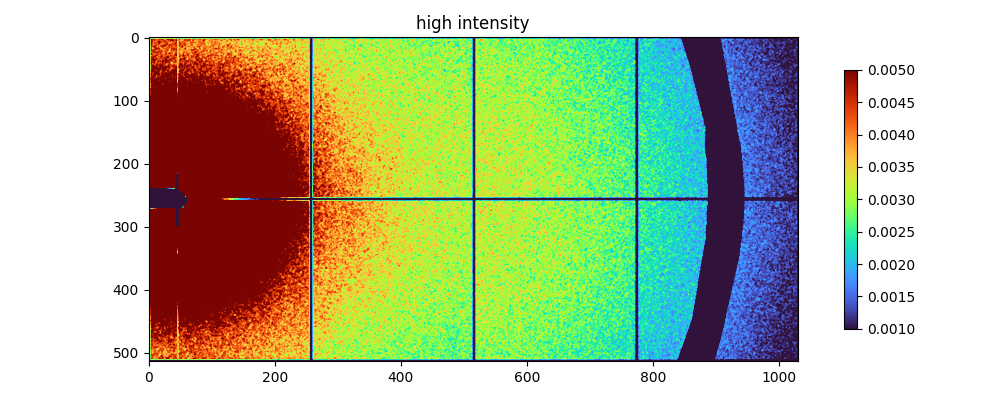

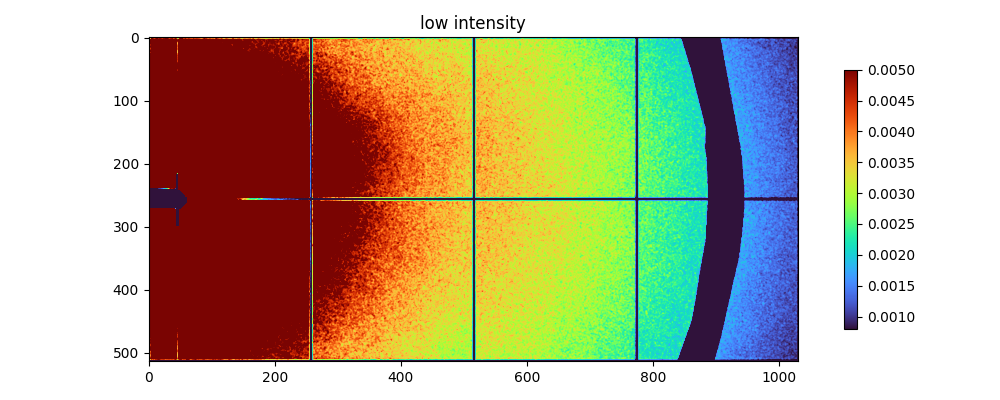

In [208]:
# mask = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/cryo-mask-230628_01.npy')

f, a2 = plt.subplots(1,1,figsize=(10,4), tight_layout=True)
im2 = a2.imshow(np.mean(image[high_int], axis=0)*mask, vmin=1e-3, vmax=5e-3, interpolation='bicubic',cmap='turbo')
plt.colorbar(im2, ax=a2, shrink=0.8)
a2.set_title('high intensity')
plt.show()


f, a2 = plt.subplots(1,1,figsize=(10,4), tight_layout=True)
im2 = a2.imshow(np.mean(image[low_int], axis=0)*mask, vmin=.8e-3, vmax=5e-3, interpolation='bicubic',cmap='turbo')
plt.colorbar(im2, ax=a2, shrink=0.8)
a2.set_title('low intensity')
plt.show()

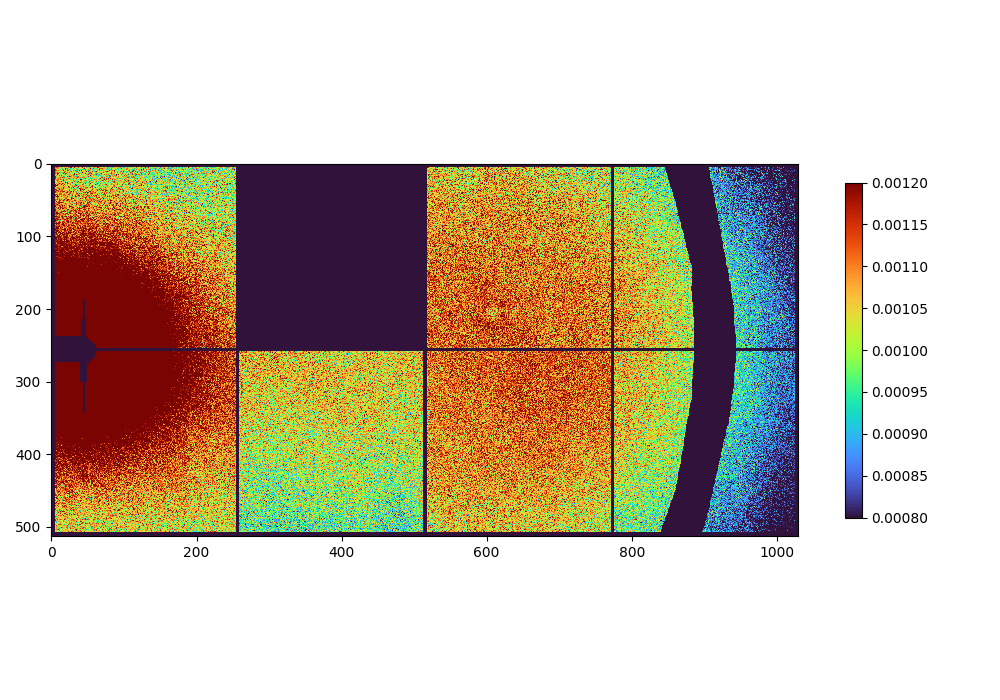

In [88]:
# mask = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/cryo-mask-230417_03.npy')
mask = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/cryo-mask-230628_01.npy')
m2 = np.ones(shape=np.shape(mask))
m2[:255, 255:515] = 0

f, a2 = plt.subplots(1,1,figsize=(10,7), tight_layout=True)
im2 = a2.imshow(image/framemax*mask*m2, vmin=8e-4, vmax=1.2e-3, interpolation='none',cmap='turbo')
plt.colorbar(im2, ax=a2, shrink=0.5)
plt.show()

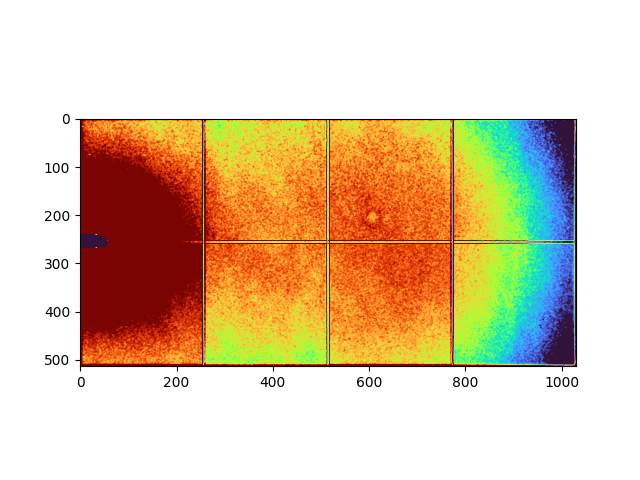

In [72]:
plt.figure()
plt.imshow(image/framemax*m, vmin=8e-4, vmax=1.2e-3, interpolation='bicubic',cmap='turbo')

# Average over all scans

In [23]:
Iqs = []
qs = d.get_item(ind_saxs[0])['soq'][:,0]
for ind in ind_saxs:
    Iqs.append(d.get_item(ind)['soq'][:,1])
Iq_avg =  np.average(Iqs, axis=0)
Iq_avg_per_spot = np.average(Iqs, axis=1)
print(np.shape(Iqs), np.shape(Iq_avg))

(88, 1000) (1000,)


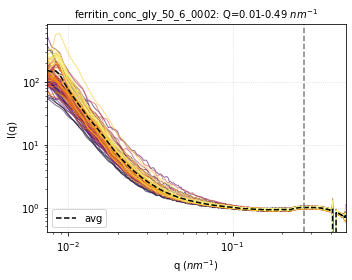

In [24]:
f, a1 = plt.subplots(1,1, tight_layout=True, figsize=(5,4))
col = plt.cm.inferno(np.linspace(0,1,len(ind_saxs)))
q_sel = 550

for i in range(len(Iqs)):
    a1.plot(qs, Iqs[i]/Iqs[i][q_sel], c=col[i], lw=1, alpha=0.6) # norm
    # a1.plot(qs, Iqs[i], c=col[i], lw=1, alpha=0.6) 

a1.plot(qs, Iq_avg/Iq_avg[q_sel], '--k', label='avg') # norm
a1.axvline(qs[q_sel], c='gray', ls='--')
# a1.plot(qs, Iq_avg, '--k', label='avg')

a1.set_xlim(qs[0],qs[-1])
a1.set_title(f'{datafolder}_{datasetnumber:04d}: Q={soq[0,0]:.2f}-{soq[-1,0]:.2f} $nm^{{-1}}$', fontsize=10)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel('q ($nm^{-1}$)')
a1.set_ylabel('I(q)')
a1.grid(ls=':', alpha=.5)
a1.legend()
plt.show()

/tmp/ipykernel_39868/376631572.py:6: RuntimeWarning: invalid value encountered in divide
  a1.plot(qs, Iqs[i]/Iqs[0], c=col[i], lw=1, alpha=0.6)
/tmp/ipykernel_39868/376631572.py:8: RuntimeWarning: invalid value encountered in divide
  a1.plot(qs, Iq_avg/Iqs[0], '--k', label='avg')


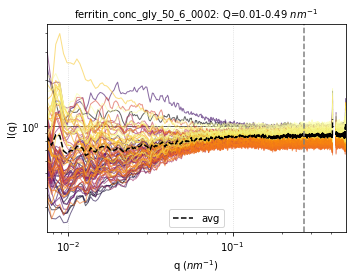

In [25]:
f, a1 = plt.subplots(1,1, tight_layout=True, figsize=(5,4))
col = plt.cm.inferno(np.linspace(0,1,len(ind_saxs)))
q_sel = 550

for i in range(len(Iqs)):
    a1.plot(qs, Iqs[i]/Iqs[0], c=col[i], lw=1, alpha=0.6)

a1.plot(qs, Iq_avg/Iqs[0], '--k', label='avg')
a1.axvline(qs[q_sel], c='gray', ls='--')

a1.set_xlim(qs[0],qs[-1])
a1.set_title(f'{datafolder}_{datasetnumber:04d}: Q={soq[0,0]:.2f}-{soq[-1,0]:.2f} $nm^{{-1}}$', fontsize=10)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel('q ($nm^{-1}$)')
a1.set_ylabel('I(q)')
a1.grid(ls=':', alpha=.5)
a1.legend()
plt.show()

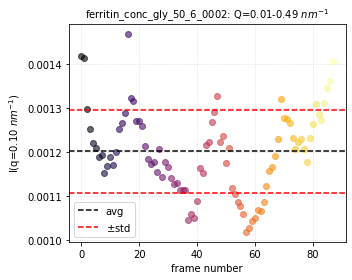

In [26]:
f, a1 = plt.subplots(1,1, tight_layout=True, figsize=(5,4))
col = plt.cm.inferno(np.linspace(0,1,len(ind_saxs)))

q_sel = 200
Iq_avg_qsel = []

for i in range(len(Iqs)):
    Iq_avg_qsel.append(Iqs[i][q_sel])
    a1.plot(i, Iqs[i][q_sel], c=col[i], ls='', alpha=0.6, marker='o')
a1.axhline(y=np.average(Iq_avg_qsel), ls='--', c='k', label='avg')
a1.axhline(y=np.average(Iq_avg_qsel)+np.std(Iq_avg_qsel), ls='--', c='r', label='$\pm$std')
a1.axhline(y=np.average(Iq_avg_qsel)-np.std(Iq_avg_qsel), ls='--', c='r')

# a1.set_xlim(qs[0],qs[-1])
a1.set_title(f'{datafolder}_{datasetnumber:04d}: Q={soq[0,0]:.2f}-{soq[-1,0]:.2f} $nm^{{-1}}$', fontsize=10)
# a1.set_xscale('log')
# a1.set_yscale('log')
a1.set_xlabel('frame number')
a1.set_ylabel(f'I(q={qs[q_sel]:.2f} $nm^{{-1}}$)')
a1.grid(ls=':', alpha=.5)
a1.legend()
plt.show()

# XPCS

**Sort based on the trace**

In [27]:
valid = [True]*len(ind_xpcs)

In [28]:
traces = []
for index in ind_xpcs:
    traces.append(d.get_item(index)['trace'][:,1].mean())
traces = np.array(traces)

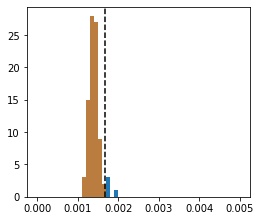

In [29]:
# sort based on the intensity
nsigma = 2
valid = traces < traces.mean() + nsigma*traces.std() #1#0.02#0255
plt.figure(figsize=(4,3.5))
plt.hist(traces, range=(0,.005), bins=50, facecolor='C0', alpha=1)
plt.axvline(x=traces.mean() + nsigma*traces.std() , ls='--', c='k')
plt.hist(traces[valid], range=(0,.005), bins=50, facecolor='C1', alpha=0.7)
plt.show()

In [30]:
# ind_xpcs_valid = ind_xpcs[valid]
ind_xpcs_valid = ind_xpcs
print(np.shape(ind_xpcs_valid), np.shape(ind_xpcs))#, np.shape(valid))

(88,) (88,)


In [31]:
g = G2(d)
g.get_g2(ind_xpcs_valid, merge='merge')

Merged g2 functions:  [0.0002] (exposure times)
                      [88] (number of correlation functions)
                      [439120] (total number of images)


In [32]:
# g.reset_rescaled()
# g.rescale(interval=(1, -10))

Fit successful: True


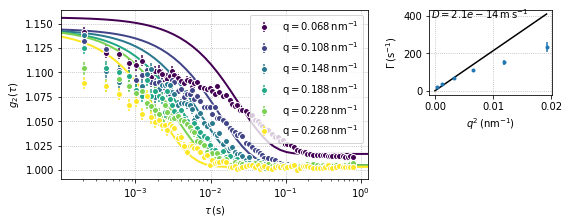

In [36]:
fig, ax = plt.subplots(figsize=(7,3), constrained_layout=True)

g.plot_g2(nq=np.arange(1,7), dofit=1, doplot='data_fit_legq',
           fix={'beta': 0.14},#, 'g0': 1},
           init={'t0': (3e-3, 0, 1),
                 'a': (.7, 0, 3),
                 'g0': (1, 0, 2),
                 #'beta': (.06, 0, 1)
                }, 
      #      fitglobal=['a'], 
           cmap='viridis',ax=ax)
ax.grid(ls=':')
#ax.set_ylim(.9, 2.5)

inset = ax.inset_axes([1.2, .5, .4, .5])
p = g.pars[0]
x = p['q']**3
y = 1/p['t0']
dy = yerr=1/p['t0']**2*p['dt0']
inset.errorbar(x, y, yerr=dy, fmt='.')
inset.set_xlabel(r"$q^2\,(\mathrm{nm^{-1}})$")
inset.set_ylabel(r"$\Gamma\,(\mathrm{s^{-1}})$")

model = LinearModel()
pars = model.make_params()
pars['intercept'].set(0, vary=False)
res = model.fit(y, pars, x=x, weights=1/dy)
xf = np.linspace(0, x.max(), 100)
yf = model.eval(res.params, x=xf)
inset.plot(xf, yf, 'k')
inset.grid(ls=':')
D = res.params['slope'].value * 1e-18
dD = res.params['slope'].stderr * 1e-18

#txt = f"$D = {D:.1e} ± {dD:.0e}\,\mathrm{{m\,s^{{-1}}}}$"
txt = f"$D = {D:.1e}\,\mathrm{{m\,s^{{-1}}}}$"
inset.text(.01,.9, txt, color='k', transform=inset.transAxes);

In [34]:
plt.figure(figsize=(4,3.5), tight_layout=True)
qv = 2
col = plt.cm.coolwarm_r(np.linspace(0,1,len(g2s)))

for i in range(len(T)):
    g = g2s[str(T[i])]
    
    g2 = np.array(g.corrFunc)
    g2_sort = g2[:,0,:,1:]
    g2_err = g2[:,1,:,1:]
    time = g2[0,0,:,0]
    
    y = (g2_sort[0,:-2,qv] - np.average(g2_sort[0,-10:-2,qv] ))/ g2_sort[0,1,qv]
    
    plt.plot(time[:-2], g2_sort[0,:-2,qv], c=col[i], ls='', marker='o', ms=4, label=T[i])
    #plt.plot(time[:-2], y, c=col[i], ls='', marker='o', ms=4, label=T[i])
plt.title(f'Q={d.setup.qv[qv]:.3f} $\mathrm{{nm}}^{{-1}}$')
plt.legend(title='Temp (K)')
plt.xscale('log')
plt.ylim(1,1.2)
plt.xlabel('t (s)', fontsize=16)
plt.ylabel('g2(t)', fontsize=16)
plt.show()

NameError: name 'g2s' is not defined

<Figure size 288x252 with 0 Axes>

# Ferritin_conc100_gly50_5_0013, 270 K full beam

In [ ]:
# to add a column to the db with the scan number in order to select the runs from the same measurement
def get_datdir_number(s):
    s = str(s)
    s = re.search(r"(?<=conc100_gly_50_1_)\d{4}", s)
    #ferritin_conc_gly50_
    if s is not None:
        return int(s.group(0))
    else:
        return
    
# add column
d.db['subdir_n'] = d.db['datdir'].apply(get_datdir_number)


In [ ]:
d.db.tail()

use sample analysis                         mod         savname  \
341  True            xpcs  2022-06-19 11:52:17.859481  s0149_0009.pkl   
342  True            xpcs  2022-06-19 11:54:06.991241  s0150_0010.pkl   
343  True            xpcs  2022-06-19 11:55:51.759336  s0151_0011.pkl   
344  True            xpcs  2022-06-19 11:57:36.971525  s0152_0012.pkl   
345  True            xpcs  2022-06-19 11:59:23.927347  s0153_0013.pkl   

                                               savfile  \
341  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
342  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
343  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
344  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   
345  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...   

                                             setupfile comment  series  \
341  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...           149.0   
342  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...           150.0   
343  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...           151.0   
344  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...           152.0   
345  /gpfs/easy/data/visitor/sc5275/id10/20220614/m...           153.0   

     t_exposure  t_readout  nframes  \
341      0.0004   0.000003   5000.0   
342      0.0004   0.000003   5000.0   
343      0.0004   0.000003   5000.0   
344      0.0004   0.000003   5000.0   
345      0.0004   0.000003   5000.0   

                                                master  first    last  \
341  /data/visitor/sc5275/id10/ferritin_conc100_gly...    0.0  4999.0   
342  /data/visitor/sc5275/id10/ferritin_conc100_gly...    0.0  4999.0   
343  /data/visitor/sc5275/id10/ferritin_conc100_gly...    0.0  4999.0   
344  /data/visitor/sc5275/id10/ferritin_conc100_gly...    0.0  4999.0   
345  /data/visitor/sc5275/id10/ferritin_conc100_gly...    0.0  4999.0   

                                                datdir  subdir_n  
341  /data/visitor/sc5275/id10/ferritin_conc100_gly...        14  
342  /data/visitor/sc5275/id10/ferritin_conc100_gly...        14  
343  /data/visitor/sc5275/id10/ferritin_conc100_gly...        14  
344  /data/visitor/sc5275/id10/ferritin_conc100_gly...        14  
345  /data/visitor/sc5275/id10/ferritin_conc100_gly...        14

# apoferritin 270 K, 8 reps per spot

In [ ]:
#subdir_n = 13
c3 = (d.db['analysis'] == 'xpcs') & (d.db['subdir_n'] == 13) #& (np.mod(d.db['series']-1,10) == 1 )
#c1 = (d.db['analysis'] == 'xpcs') & (d.db['subdir_n'] == 14) #& (np.mod(d.db['series']-1,10) == 9 )
valid = [True]*len(c0)

ind0 = d.db.index.values[valid & c0]
ind1 = d.db.index.values[valid & c1]

print("Selected runs0: ", len(ind0))
print("Selected runs1: ", len(ind1))

# apoferritin 270 K, 4reps per spot

In [ ]:
#subdir_n = 13
c0 = (d.db['analysis'] == 'xpcs') & (d.db['subdir_n'] == 13) #& (np.mod(d.db['series']-1,10) == 1 )
c1 = (d.db['analysis'] == 'xpcs') & (d.db['subdir_n'] == 14) #& (np.mod(d.db['series']-1,10) == 9 )
valid = [True]*len(c0)

ind0 = d.db.index.values[valid & c0]
ind1 = d.db.index.values[valid & c1]

print("Selected runs0: ", len(ind0))
print("Selected runs1: ", len(ind1))

Selected runs0:  199
Selected runs1:  147


### Full beam

In [ ]:
g0 = G2(d)
g0.get_g2(ind0, merge='merge')

Merged g2 functions:  [0.0002] (exposure times)
                      [199] (number of correlation functions)
                      [995000] (total number of images)


In [ ]:
g0.reset_rescaled()
g0.rescale(interval=(1, -10))

Fit successful: True


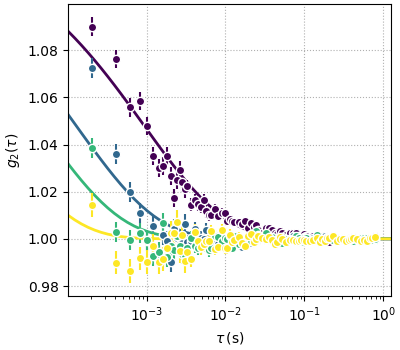

In [ ]:
fig, ax = plt.subplots(figsize=(4,3.5), constrained_layout=True)

g0.plot_g2(nq=np.arange(1,5), dofit=1, doplot='data_fit',
           fix={'beta': 0.13},
           init={'t0': (3e-3, 0, 1),
                 'a': (.7, 0, 3),
                 'g0': (1, 0, 2),
                 #'beta': (.06, 0, 1)
                }, 
           fitglobal=['g0', 'a'], 
           cmap='viridis',ax=ax)
ax.grid(ls=':')
#ax.set_ylim(.9, 2.5)

In [ ]:
g0.pars[0]

q        t0       dt0         a        da        g0       dg0    b0  \
0  0.045  0.004843  0.000209  1.000053  0.000077  0.422382  0.015318  0.13   
1  0.080  0.000664  0.000085  1.000053  0.000077  0.422382  0.015318  0.13   
2  0.115  0.000232  0.000057  1.000053  0.000077  0.422382  0.015318  0.13   
3  0.150  0.000056  0.000056  1.000053  0.000077  0.422382  0.015318  0.13   

   db0  beta  dbeta      chisqr    redchi         bic         aic  
0  0.0  0.13    0.0  559.017689  1.780311  213.125165  190.515239  
1  0.0  0.13    0.0  559.017689  1.780311  213.125165  190.515239  
2  0.0  0.13    0.0  559.017689  1.780311  213.125165  190.515239  
3  0.0  0.13    0.0  559.017689  1.780311  213.125165  190.515239

### attenuated

In [ ]:
g1 = G2(d)
g1.get_g2(ind1, merge='merge')

Merged g2 functions:  [0.0004] (exposure times)
                      [147] (number of correlation functions)
                      [735000] (total number of images)


In [ ]:
g1.reset_rescaled()
g1.rescale(interval=(1, -10))

Fit successful: False


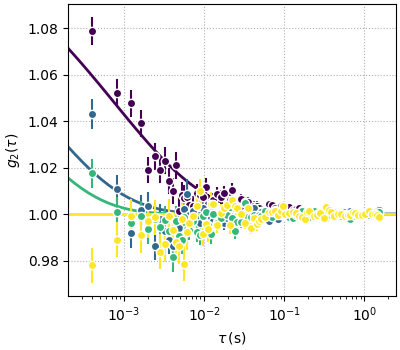

In [ ]:
fig, ax = plt.subplots(figsize=(4,3.5), constrained_layout=True)

g1.plot_g2(nq=np.arange(1,5), dofit=1, doplot='data_fit',
           fix={'beta': 0.13},
           init={'t0': (3e-3, 0, 1),
                 'a': (.7, 0, 3),
                 'g0': (1, 0, 2),
                 #'beta': (.06, 0, 1)
                }, 
           fitglobal=['g0', 'a'], 
           cmap='viridis',ax=ax)
ax.grid(ls=':')
#ax.set_ylim(.9, 2.5)

## Comparison

Fit successful: True
Fit successful: True


Text(0.5, 1.0, 'Q=0.115 $\\mathrm{nm}^{-1}$')

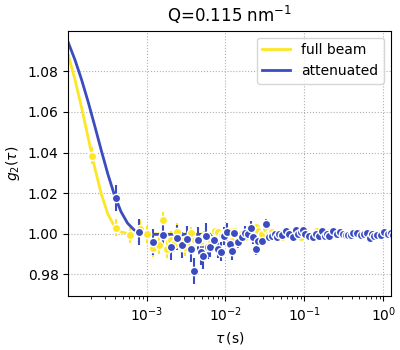

In [ ]:
fig, a1 = plt.subplots(1,1,figsize=(4,3.5), constrained_layout=True)

qmin, qmax = 3, 4
g0.plot_g2(nq=np.arange(qmin,qmax), dofit=1, doplot='data_fit',
           cmap='viridis_r',ax=a1)
g1.plot_g2(nq=np.arange(qmin,qmax), dofit=1, doplot='data_fit',
           cmap='coolwarm_r',ax=a1)
a1.grid(ls=':')
a1.legend(['full beam', 'attenuated'])
a1.set_title(f'Q={d.setup.qv[qmin]:.3f} $\mathrm{{nm}}^{{-1}}$')
#a1.set_ylim(.5, 2.5)

## TTC

In [ ]:
ttc0 = G2(d)
ttc0.get_twotime(ind0, twotime_par=1)

In [ ]:
ttc1 = G2(d)
ttc1.get_twotime(ind1, twotime_par=1)

In [ ]:
tmp = d.get_item(ind0[0])#['twotime_xy'].keys()
ttcxy = tmp['twotime_xy'] # shape (5000,)
qval = tmp['qv']
del tmp

In [ ]:
#ttc0.plot_twotime(ind, twotime_par=1,interpolation='gaussian', clim=[1, 1.15])# ,norm=LogNorm()

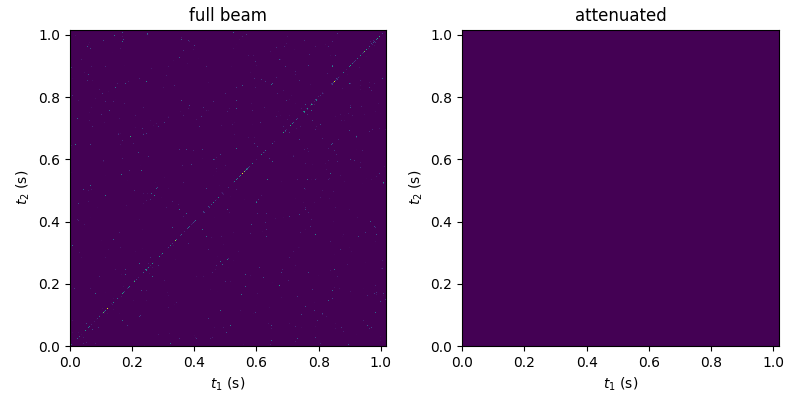

In [ ]:
ttc_0 = ttc0.twotime
ttc_1 = ttc1.twotime

fig, (a1,a2) = plt.subplots(1,2,figsize=(8,4))
im1=a1.imshow(ttc_0,origin='lower',extent=[ttcxy[0], ttcxy[-1]]*2, vmax=1.05,vmin=1) # norm=LogNorm()
im2=a2.imshow(ttc_1, origin='lower',extent=[ttcxy[0], ttcxy[-1]]*2, vmax=1.001,vmin=.99)

a1.set_xlabel('$t_1$ (s)')
a1.set_ylabel('$t_2$ (s)')
a2.set_xlabel('$t_1$ (s)')
a2.set_ylabel('$t_2$ (s)')
a1.set_title('full beam')
a2.set_title('attenuated')
#cbar = colorbar()
#fig.colorbar(im1, cax=a1)
#colorbar()
#a1.set_title(f'Q={qval[1]:.3f} $\mathrm{{nm}}^{{-1}}$')
#a2.set_title(f'Q={qval[2]:.3f} $\mathrm{{nm}}^{{-1}}$')
plt.tight_layout()

# other stuff

In [ ]:
txt

'$D = 272737449771.07 ± 50055991997.19\\,(\\mathrm{\\mu m\\,s^{-1}})$'

<ErrorbarContainer object of 3 artists>

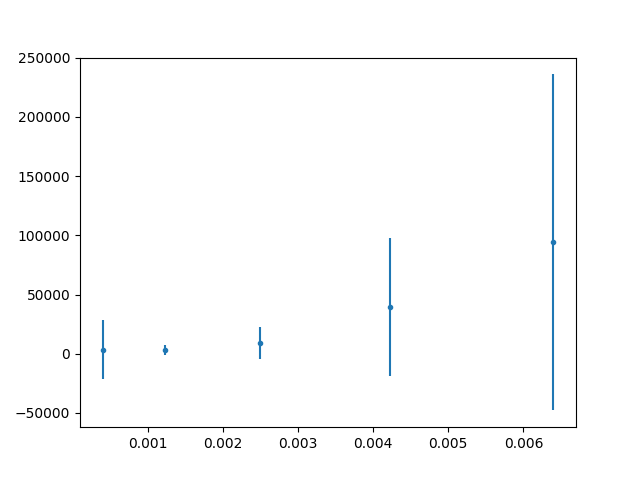

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
p = g2.pars[0]
ax.errorbar(p['q']**2, 1/p['t0'], yerr=1/p['t0']**2*p['dt0'], fmt='.')

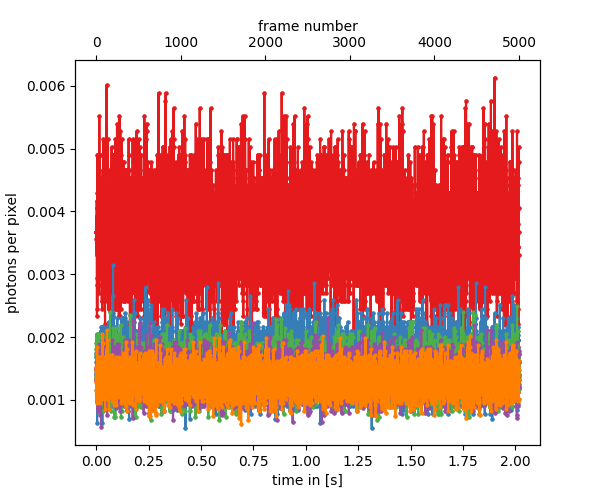

In [ ]:
g2.plot_trace(ind[0])

In [ ]:
g2.pars[0]

q        t0       dt0         a        da        g0       dg0  beta  \
0  0.020  0.000277  0.001893  0.995785  0.093209  0.197839  0.036936   1.0   
1  0.035  0.000350  0.000513  1.000155  0.001016  0.197839  0.036936   1.0   
2  0.050  0.000109  0.000160  1.000055  0.000180  0.197839  0.036936   1.0   
3  0.065  0.000025  0.000037  1.000385  0.000141  0.197839  0.036936   1.0   
4  0.080  0.000011  0.000016  0.999915  0.000126  0.197839  0.036936   1.0   

      dbeta   b0       db0      chisqr    redchi        bic         aic  
0  0.187998  1.0  0.187998  274.365488  0.707128 -78.903799 -126.801373  
1  0.187998  1.0  0.187998  274.365488  0.707128 -78.903799 -126.801373  
2  0.187998  1.0  0.187998  274.365488  0.707128 -78.903799 -126.801373  
3  0.187998  1.0  0.187998  274.365488  0.707128 -78.903799 -126.801373  
4  0.187998  1.0  0.187998  274.365488  0.707128 -78.903799 -126.801373

# Other stuff

In [ ]:
traces = []
for index in xana.db.index:
    traces.append(xana.get_item(index)['trace'][:,1].mean())
valid = np.array(traces) < .01
plt.figure()
plt.hist(traces, range=(0,.01))

(array([  0., 132.,   8.,   2.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 ]),
 <BarContainer object of 10 artists>)

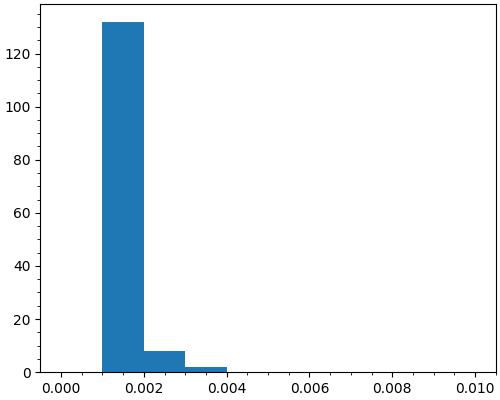

<ErrorbarContainer object of 3 artists>

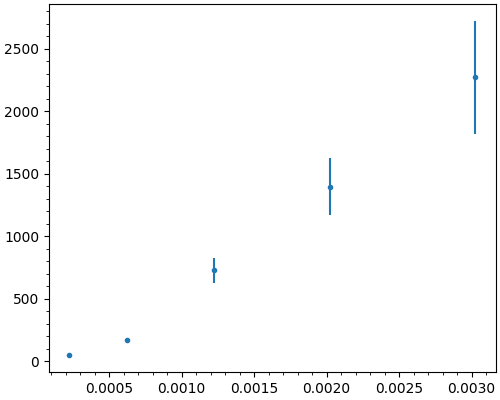

In [ ]:
fig, ax = plt.subplots()
p = g2.pars[0]
ax.errorbar(p['q']**2, 1/p['t0'], yerr=1/p['t0']**2*p['dt0'], fmt='.')


/home/esrf/mario1c/Xana/Xana/Decorators.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(*x, figsize=y)


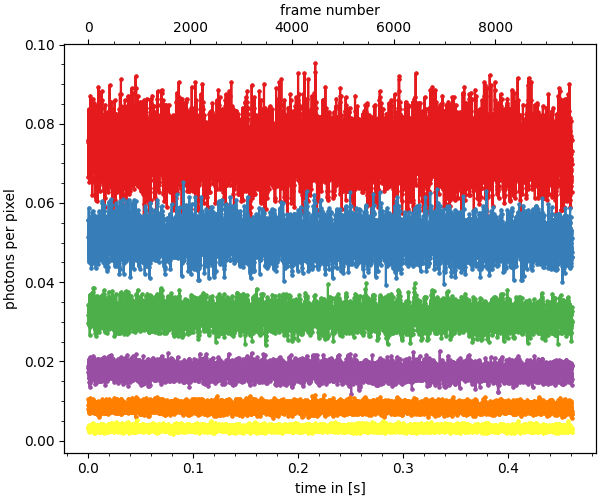

In [ ]:
g2.plot_trace(5)

**SAXS**

In [ ]:
from Xana.SaxsAna import Soq

In [ ]:
ind = xana.db['analysis'] == 'saxs'
ind = xana.db[ind].index.values

In [ ]:
len(ind)

0

In [ ]:
soq = Soq(xana)

/home/esrf/mario1c/Xana/Xana/SaxsAna/Soq.py:170: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout(rect=[0, 0, 0.98, 1])


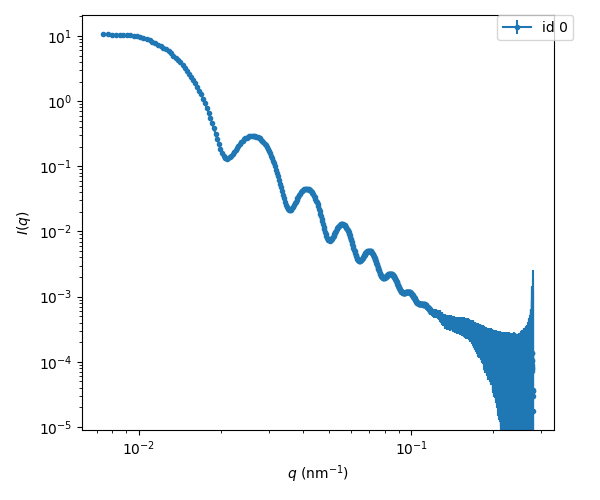

In [ ]:
soq.plot_soq(ind[0],)